In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from textblob import TextBlob
plt.style.use('seaborn-whitegrid')

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [79]:
df = pd.read_csv('TSLA_202010061609.txt', sep='!', names=['date','nan', 'text', 'text1',])

In [80]:
df.head()

,date,nan,text,text1
0,9 minutes ago•Last reply 34 seconds ago,NaN,For you to understand Tesla is not just car o...,NaN
1,43 seconds ago,NaN,@Requief missed out on buying Tesla stock at ...,NaN
2,53 seconds ago,NaN,"Oh baby, road to 300$ pretty pretty soon..",NaN
3,3 minutes ago•Last reply 54 seconds ago,NaN,this should be the catylast to the 10% correc...,NaN
4,2 minutes ago,NaN,What a terrible after market.,NaN


In [83]:
df = df.drop(columns=['nan', 'text1'])

In [84]:
df

,date,text
0,9 minutes ago•Last reply 34 seconds ago,For you to understand Tesla is not just car o...
1,43 seconds ago,@Requief missed out on buying Tesla stock at ...
2,53 seconds ago,"Oh baby, road to 300$ pretty pretty soon.."
3,3 minutes ago•Last reply 54 seconds ago,this should be the catylast to the 10% correc...
4,2 minutes ago,What a terrible after market.
5,3 minutes ago,TSLA....panic sell just start today.
6,43 minutes ago•Last reply 4 minutes ago,"“Sadly, Trump is rejecting the urgent warning..."
7,4 minutes ago,$320 is next stop. Don't get trap..
8,11 minutes ago•Last reply 8 minutes ago,He’s going down and taking everyone with him
9,34 minutes ago•Last reply 8 minutes ago,"Miss earnings end of this month, expect to se..."


In [106]:
df['date_posted'] = df['date'].str.split('•').str[0]

In [119]:
df = df[['date_posted', 'text']]
df.dropna(inplace=True)

In [120]:
df

,date_posted,text
0,9 minutes ago,For you to understand Tesla is not just car o...
1,43 seconds ago,@Requief missed out on buying Tesla stock at ...
2,53 seconds ago,"Oh baby, road to 300$ pretty pretty soon.."
3,3 minutes ago,this should be the catylast to the 10% correc...
4,2 minutes ago,What a terrible after market.
5,3 minutes ago,TSLA....panic sell just start today.
6,43 minutes ago,"“Sadly, Trump is rejecting the urgent warning..."
7,4 minutes ago,$320 is next stop. Don't get trap..
8,11 minutes ago,He’s going down and taking everyone with him
9,34 minutes ago,"Miss earnings end of this month, expect to se..."


In [121]:
#  Clean the text

# Cleate a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)    # re.sub means 'remove and substitute' , Removed @mentions
    text = re.sub(r'#','', text)   # Removing the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) # REmoving RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove the hyperlink
    text = re.sub(r'_[^\s]+', '', text) # Remove '_' which usually being used in ID
    text = text.encode('ascii', 'ignore').decode('ascii') # remove emojis
    
    return text

In [125]:
#  Cleaning the text
df['text'] = df['text'].apply(cleanTxt)

# Show the cleaned text
df

,date_posted,text
0,9 minutes ago,For you to understand Tesla is not just car o...
1,43 seconds ago,missed out on buying Tesla stock at 170$ pre...
2,53 seconds ago,"Oh baby, road to 300$ pretty pretty soon.."
3,3 minutes ago,this should be the catylast to the 10% correc...
4,2 minutes ago,What a terrible after market.
5,3 minutes ago,TSLA....panic sell just start today.
6,43 minutes ago,"Sadly, Trump is rejecting the urgent warnings..."
7,4 minutes ago,$320 is next stop. Don't get trap..
8,11 minutes ago,Hes going down and taking everyone with him
9,34 minutes ago,"Miss earnings end of this month, expect to se..."


In [126]:
#  Create a fundtion to get the subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two new columns
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,date_posted,text,Subjectivity,Polarity
0,9 minutes ago,For you to understand Tesla is not just car o...,0.541667,0.166667
1,43 seconds ago,missed out on buying Tesla stock at 170$ pre...,0.066667,-0.166667
2,53 seconds ago,"Oh baby, road to 300$ pretty pretty soon..",1.000000,0.250000
3,3 minutes ago,this should be the catylast to the 10% correc...,0.000000,0.000000
4,2 minutes ago,What a terrible after market.,1.000000,-1.000000
5,3 minutes ago,TSLA....panic sell just start today.,0.000000,0.000000
6,43 minutes ago,"Sadly, Trump is rejecting the urgent warnings...",0.756250,-0.365625
7,4 minutes ago,$320 is next stop. Don't get trap..,0.000000,0.000000
8,11 minutes ago,Hes going down and taking everyone with him,0.288889,-0.155556
9,34 minutes ago,"Miss earnings end of this month, expect to se...",0.444444,0.250000


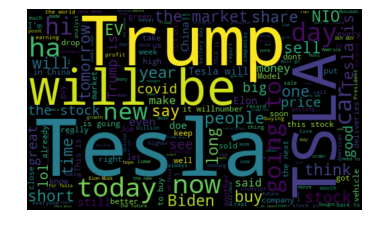

In [128]:
#  Plot the wordcloud
from wordcloud import WordCloud

allwords = ' '.join( [text for text in df['text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [129]:
#  Create a function to compute the negative, neutral and postitive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,date_posted,text,Subjectivity,Polarity,Analysis
0,9 minutes ago,For you to understand Tesla is not just car o...,0.541667,0.166667,Positive
1,43 seconds ago,missed out on buying Tesla stock at 170$ pre...,0.066667,-0.166667,Negative
2,53 seconds ago,"Oh baby, road to 300$ pretty pretty soon..",1.000000,0.250000,Positive
3,3 minutes ago,this should be the catylast to the 10% correc...,0.000000,0.000000,Neutral
4,2 minutes ago,What a terrible after market.,1.000000,-1.000000,Negative
5,3 minutes ago,TSLA....panic sell just start today.,0.000000,0.000000,Neutral
6,43 minutes ago,"Sadly, Trump is rejecting the urgent warnings...",0.756250,-0.365625,Negative
7,4 minutes ago,$320 is next stop. Don't get trap..,0.000000,0.000000,Neutral
8,11 minutes ago,Hes going down and taking everyone with him,0.288889,-0.155556,Negative
9,34 minutes ago,"Miss earnings end of this month, expect to se...",0.444444,0.250000,Positive


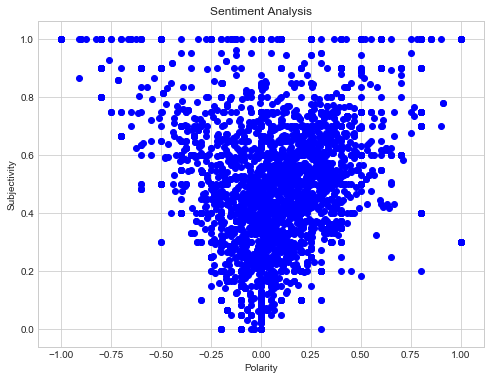

In [130]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

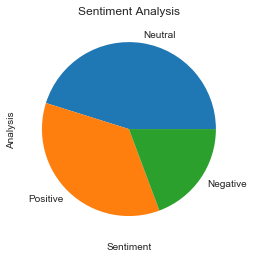

In [132]:
# Show the value counts
df['Analysis'].value_counts()

#  plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()